<a href="https://colab.research.google.com/github/sprashant19/Crypto_price_prediction/blob/main/Crypto_weekly_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#Importing the necessary modules or libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [27]:
#Accessing the Data
data2=pd.read_csv("/content/APE3-USD_weekly.csv")
data2

,Date,Open,High,Low,Close,Adj Close,Volume,Previous_week_open,Previous_week_high,Previous_week_low
0,14-03-2022,1.000397,39.398857,1.000394,9.603505,9.603505,16186503758,NaN,NaN,NaN
1,21-03-2022,9.604387,14.449736,9.593103,14.276739,14.276739,12758635072,1.000397,39.398857,1.000394
2,28-03-2022,14.272323,15.492145,11.970219,12.446993,12.446993,5848668755,9.604387,14.449736,9.593103
3,04-04-2022,12.431074,12.777606,10.567146,12.158826,12.158826,3336763285,14.272323,15.492145,11.970219
4,11-04-2022,12.149710,13.464239,10.692602,11.736778,11.736778,3637827828,12.431074,12.777606,10.567146
5,18-04-2022,11.737742,18.217287,10.997159,16.818827,16.818827,10101212726,12.149710,13.464239,10.692602
6,25-04-2022,16.819950,26.913910,15.691833,15.971160,15.971160,24423460930,11.737742,18.217287,10.997159
7,02-05-2022,15.968777,17.550270,11.104078,11.206094,11.206094,10555124667,16.819950,26.913910,15.691833
8,09-05-2022,11.208441,11.578635,5.248232,9.092935,9.092935,10638591966,15.968777,17.550270,11.104078
9,16-05-2022,9.090923,9.209086,7.470881,8.041804,8.041804,4054734881,11.208441,11.578635,5.248232


In [28]:
#dropping the data of 17-07-2021, since without data of previous week, its not possible to calculate this  previous data.
data2=data2.iloc[1:]


In [29]:
#dropping the unnecessary data
data2 = data2.drop(columns=['Adj Close','Date','Open','High','Low','Volume'])


In [30]:
#Findng the correlation between the feature and target
data2[['Previous_week_open', 'Previous_week_high',
       'Previous_week_low','Close']].corr()

,Previous_week_open,Previous_week_high,Previous_week_low,Close
Previous_week_open,1.000000,0.247650,0.937407,0.502503
Previous_week_high,0.247650,1.000000,0.288717,0.707872
Previous_week_low,0.937407,0.288717,1.000000,0.575087
Close,0.502503,0.707872,0.575087,1.000000


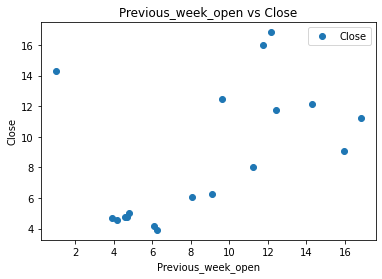

In [31]:
data2.plot(x='Previous_week_open',y='Close',style='o')
plt.title('Previous_week_open vs Close')
plt.xlabel('Previous_week_open')
plt.ylabel('Close')
plt.show()

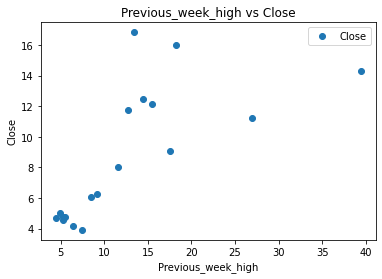

In [32]:
data2.plot(x='Previous_week_high',y='Close',style='o')
plt.title('Previous_week_high vs Close')
plt.xlabel('Previous_week_high')
plt.ylabel('Close')
plt.show()

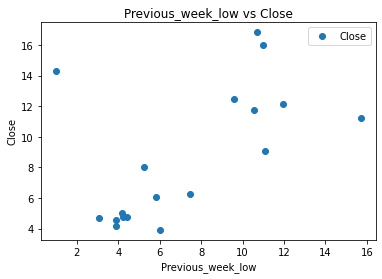

In [33]:
data2.plot(x='Previous_week_low',y='Close',style='o')
plt.title('Previous_week_low vs Close')
plt.xlabel('Previous_week_low')
plt.ylabel('Close')
plt.show()

In [34]:
#Preparing the Data
x2=data2[['Previous_week_open', 'Previous_week_high',
       'Previous_week_low']].values
y2=data2['Close'].values

In [35]:
#Splitting the Data
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.25)

In [36]:
#Model Training
regressor=LinearRegression()
regressor.fit(x2_train,y2_train)

LinearRegression()

In [37]:
#Prediction of test data
y2_pred=regressor.predict(x2_test)
y2_pred

array([ 5.87230619,  7.3553013 , 10.7486959 ,  5.25398194,  8.2036448 ])

In [38]:
#Actual Value and predicted Value for test data
df2=pd.DataFrame({'Actual':y2_test,'Predicted':y2_pred})
df2

,Actual,Predicted
0,4.146917,5.872306
1,3.910886,7.355301
2,12.446993,10.748696
3,4.702744,5.253982
4,6.236197,8.203645


In [39]:
#Evaluation Metrics
print("R2 Score : ",metrics.r2_score(y2_test,y2_pred))

R2 Score :  0.5679115739258449


In [40]:
#Coefficients of each feature 
m1=regressor.coef_[0]
m2=regressor.coef_[1]
m3=regressor.coef_[2]
print("Coefficient of Previous_week_open : ",m1)
print("Coefficient of Previous_week_high : ",m2)
print("Coefficient of Previous_week_low : ",m3)

Coefficient of Previous_week_open :  -0.1750032102720744
Coefficient of Previous_week_high :  0.26024986930421334
Coefficient of Previous_week_low :  0.5989149438072633


In [41]:
#Intercept value
regressor.intercept_ 

2.9234998087987183

In [42]:
#Tommorow's prediction
u = float(input("Enter Today's Open value : "))
v = float(input("Enter Today's High Value : "))
w = float(input("Enter Today's Low Value : "))
c=regressor.intercept_ 

y = m1*u + m2*v + m3*w  + c
print("Tommorow's prediction is : ",y)


Enter Today's Open value : 16.81995
Enter Today's High Value : 26.91391
Enter Today's Low Value : 15.69183
Tommorow's prediction is :  16.38236760483143
